"Gần như sức mạnh mọi deep learning là từ thuật toán rất quan trọng Stochastic Gradient Descent (SGD)" Ian Goodfellow<br><br>
Giờ chúng ta đi sang một phần quan trọng nhất của machine learning,  neural networks, và deep learning là **tối ưu hóa**. Các thuật toán tối ưu hóa là sức mạnh cho các mạng nơ-ron có thể học các khuôn mẫu từ dữ liệu. Mà qua những kiến thức đã học, ta biết được rằng để mô hình phân loại có độ chính xác cao phụ thuộc vào việc tìm ra bộ trọng số **W** và bias vector **b** theo đó các data points được phân loại chính xác.<br>
Nhưng làm sao để tìm và có được ma trận trọng số **W** và bias vector **b**? Liệu ta có thể khởi tạo chúng ngẫu nhiên và thử lặp đi lặp lại nhiều lần đến khi có được bộ tham số phù hợp cho mô hình phân loại? Có thể -nhưng các mạng deep learning hiện đại có đến 10 triệu tham số, mò mẫm tìm sẽ rất mất thời gian.<br>
Thay vì dựa trên những gì thuần về ngẫu nhiên, ta cần định ra một thuật toán tối ưu, trong đó ta cải thiện **W** và **b**.<br>
Trong phần này ta sẽ đi tìm hiểu thuật toán bổ biến nhất được dùng trong mạng nơ-ron và các mô hình deep learning: thuật toán Gradient Descent. Thuật toán này có nhiều biến thể nhưng ý tưởng là như nhau: tương tác đánh giá bộ tham số, tính toán loss và thêm những bước nhỏ khác để điều chỉnh hướng giảm loss.

# I. Gradient Descent

Thuật toán Gradient Descent có 2 "mùi vị" chính:
- Chuẩn "Vanilla"
- Tối ưu hóa "Stochastic"

## 1.1 The Loss Landscape and Optimization Surface

Phương pháp Gradient Descent là thuật toán tối ưu lặp lại trên một loss landscape (hay còn gọi là bề mặt tối ưu). Thuật toán này được minh họa với các trọng số theo trục x và loss cho bộ trọng số đã cho đi theo trục y<br>
<img src="https://i.imgur.com/mA6HxiL.png" />
Như chúng ta có thể thấy bề mặt của chúng ta có những điểm lồi và lõm. Những điểm lồi lên là local maximum đại diện cho vùng có loss cao. Và ngược lại những điểm lõm xuống là local minimum đại diện cho vùng có loss thấp. Điểm mà có chỗ đó landscape có loss thấp nhất trong các điểm gọi là global minimum. Lý tưởng là ta tìm được điểm này (tương ứng với bộ thông số) thì bộ thông số tối ưu là tốt nhất.<br>
Câu hỏi đặt ra là: "Tại sao không vào thẳng điểm global minimum này mà phải tìm? Chẳng phải nó rõ ràng trên hình vậy sao?"  Vấn đề là ta không thể biết trước được hình thù của loss landscape. Nếu chúng ta có một thuật toán tối ưu hóa, chúng phải sẽ phải mò mẫm chỗ nào đó trên biểu đồ và không biết được landscape tiếp theo trông như thế nào. Và chúng ta sẽ phài tìm được đến điểm có local loss minimum nếu không muốn đi nhầm sang local loss maximum.<br>
Vấn đề là hình trên mới có 2 chiều, trong khi bài toán phức tạp có thể có rất nhiều chiều (hàng 10, hàng 100 đến hàng 1000 chiều). Ví dụ ở cái tô bên phải. Mỗi điểm trên bề mặt của nó tương ứng với một loss riêng của bộ tham số ma trận trọng số **W** và bias vector **b**. Mục đích của chúng ta là thử các bộ tham số này có giá trị khác nhau để đánh giá loss, sau đó từng bước tìm giá trị tối ưu hóa tốt hơn để giảm loss.

## 1.2 The “Gradient” in Gradient Descent

Cái "đồi" trong Gradient Descent là ma trận trọng số **W**. Chúng ta sẽ đi ngẫu nhiên từ điểm nào đó trên loss landscape, từ đó đi theo đường slope của gradient **W**

Gradient Descent là việc cố gắng tối ưu hóa tham số để giảm loss và tăng độ chính xác phân loại qua tiến trình lặp lại chỉnh hướng tiến đến vị trí có minimize loss

## 1.3 Treat It Like a Convex Problem (Even if It’s Not)

Chúng ta sẽ coi loss landscape như một bề mặt lồi, tức là mọi điểm local minimum cũng là global minimum mặc dù thực tế không phải. Giống như hình minh họa cái tô vậy, thuật toán sẽ đơn giản đi từ phần đỉnh và chầm chậm giảm gradient cho tới khi chạm dưới cùng. Chúng ta có thể không tìm được điểm local minimum nhưng bởi vì như vậy là cũng đủ tốt rồi.<br>
"Một thuật toán tối ưu có thể không đảm bảo được đến được điểm local minimum với thời gian hợp lý, mà thường nhanh chóng tìm một điểm có giá trị loss function thấp đủ để hữu ích.<br>
Chúng ta thường kì vọng lớn rằng sẽ tìm được điểm local minimum hay global minium nhưng thực tế hiếm khi xảy ra. Thay vào đó ta dừng ở điểm có loss thấp - điểm này có thể còn không phải local minimum, nhưng trong thực tiễn thì như vậy là cũng đủ tốt.

## 1.4 The Bias Trick

Hàm chấm điểm gồm bộ tham số ma trận trọng số **W** và bias vector **b**. Nhưng vì việc theo dõi 2 biến riêng biệt nên rất khó khăn nên có một kĩ thuật gọi là bias trick, kết hợp W và b lại với nhau. Để kết hợp thì ta phải thêm một cột vào data input X chứa hằng số 1, đây là chiều bias của chúng ta.<br>
$f(x_i, W) = W.x_i$<br>
<img src="https://i.imgur.com/gqD5tQ9.png" />
Ví dụ ở trong ngữ cảnh là tập data "chó, mèo, gấu trúc" thì một hình có 32x32x3 =3072 pixels. Mỗi $x_i$ đại diện cho một vector [3072 x 1]. Thêm một chiều với hằng số 1 thì thành vector [3073 x1]

## 1.5 Pseudocode for Gradient Descent

In [ ]:
while True:
    Wgradient = evaluate_gradient(loss, data, W)
    W += -alpha * Wgradient

pseudocode ở trên tương tự với nhiều biến thể của gradient descent. 
- dòng 1 gồm các điều kiện để lặp như chạy bao nhiêu epoch, loss bao nhiêu là thích hợp, loss không cải thiện sau bao nhiêu epoch là dừng
- dòng 2 là một hàm đánh giá gradient, hàm này trả về một vector k-chiều với k là số chiều của hình ảnh hay feature vector. 
- dòng 3 là ứng dụng Gradient Descent, với alpha là learning rate - kiểm soát tốc độ học của mô hình. Nếu alpha quá lớn, thì điểm sẽ bi nẩy qua 2 bên của loss landscape. Nếu quá nhỏ thì sẽ mất nhiều thời gian để đến được điểm ở dưới.

## 1.6 Implementing Basic Gradient Descent in Python

In [2]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

def sigmoid_activation(x):
    # compute the sigmoid activation value for a given input
    return 1.0/(1 + np.exp(-x))

Sigmoid activation là hàm activation có hình chữ S, chia tách nhau ở 0.5. Ví dụ trên 0.5 là nhãn A, nhỏ hơn hoặc bằng là nhãn B. Activation này thiên về phân loại dữ liệu có 2 class

In [3]:
def predict(X, W): #scoring function
    # take the dot product between our features and weight matrix
    preds = sigmoid_activation(X.dot(W))
    
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <=0.5] = 0
    preds[preds > 0.5] = 1
    return preds

tạo dữ liệu có phân phối chuẩn, gồm 1000 phần tử, 2 nhãn. Data này 2 chiều

In [4]:
# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)

In [5]:
X.shape

(1000, 2)

In [6]:
y.shape

(1000,)

Áp dụng kĩ thuật "bias trick" thêm cột mới vào data input là cột các số 1 để gộp chung W và b và khỏi phải theo dõi bias vector b. Holdout chia train test 50%

In [7]:
y = y.reshape((y.shape[0], 1))
# insert a column of 1’s as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix
X = np.c_[X, np.ones((X.shape[0]))]

# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

In [8]:
trainX.shape

(500, 3)

In [9]:
trainY.shape

(500, 1)

In [10]:
X.shape

(1000, 3)

Khởi tạo ngẫu nhiên ma trận trọng số theo phân phối chuẩn. **Có cùng số chiều của output features**

In [11]:
W = np.random.randn(X.shape[1], 1) # cùng số chiều của X (3 chiều)
losses= []

In [12]:
W # initial weight

array([[-0.10162924],
       [-0.06722859],
       [-0.94822955]])

W có khởi tạo tốt là một điểm then chốt để việc train mô hình mất ít thời gian. 

In [13]:
alpha = 0.01
epochs = 100
# loop over the desired number of epochs
for epoch in np.arange(0, epochs):
    # take the dot product between our features ‘X‘ and the weight
    # matrix ‘W‘, then pass this value through our sigmoid activation
    # function, thereby giving us our predictions on the dataset
    preds = sigmoid_activation(trainX.dot(W))

    # now that we have our predictions, we need to determine the
    # ‘error‘, which is the difference between our predictions and
    # the true values
    error = preds - trainY
    loss = np.sum(error**2)
    losses.append(loss)
    # the gradient descent update is the dot product between our
    # features and the error of the predictions
    gradient = trainX.T.dot(error)
    # in the update stage, all we need to do is "nudge" the weight
    # matrix in the negative direction of the gradient (hence the
    # term "gradient descent" by taking a small step towards a set
    # of "more optimal" parameters
    W += -alpha*gradient # Update weight
    
    # check to see if an update should be displayed
    if epoch ==0 or (epoch +1)%5 ==0:
        print("[INFO] epoch={}, loss={}".format(int(epoch+1), loss))

[INFO] epoch=1, loss=61.45078876567517
[INFO] epoch=5, loss=9.029228586008735
[INFO] epoch=10, loss=6.454834237093994
[INFO] epoch=15, loss=3.179128184255932
[INFO] epoch=20, loss=1.2041196861851176
[INFO] epoch=25, loss=0.47043652814649906
[INFO] epoch=30, loss=0.19815311708133654
[INFO] epoch=35, loss=0.10310996639018245
[INFO] epoch=40, loss=0.06493382859659247
[INFO] epoch=45, loss=0.04656253417192351
[INFO] epoch=50, loss=0.03633938606811522
[INFO] epoch=55, loss=0.029993829790076847
[INFO] epoch=60, loss=0.02571761742083575
[INFO] epoch=65, loss=0.022649255800972004
[INFO] epoch=70, loss=0.020337746786203367
[INFO] epoch=75, loss=0.018528364157938817
[INFO] epoch=80, loss=0.01706802698503988
[INFO] epoch=85, loss=0.015859882381425827
[INFO] epoch=90, loss=0.014839945630147493
[INFO] epoch=95, loss=0.013964364142385699
[INFO] epoch=100, loss=0.013202119992267928


**Evaluate model**

In [14]:
preds = predict(testX, W)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       250
           1       0.99      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



**Plot**

In [22]:
testX[0:5]

array([[ -7.22536245,  -2.570183  ,   1.        ],
       [  0.78797736,   5.69782673,   1.        ],
       [ -1.88941415,   0.7577271 ,   1.        ],
       [ -1.8617496 ,   5.9803173 ,   1.        ],
       [-10.93739732,  -5.93113231,   1.        ]])

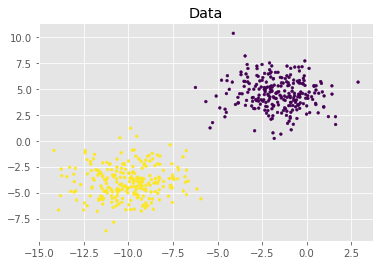

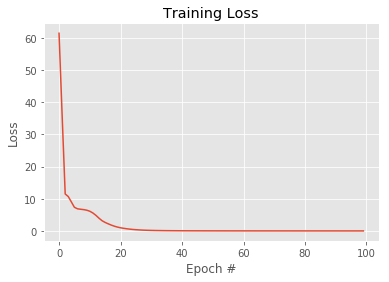

In [19]:
# Plot the testing classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:,0], testX[:,1], marker=".", c=testY.reshape((500,)), s=30)
# x-axis: lấy value cột 0
# y-axis: lấy value cột 1
# c=testY.reshape((500,)) đổi màu value theo tính chất của testY

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

Biểu đồ "Data" minh họa dữ liệu của test set, ta có thể thấy ở hình này dường như có một bounder line phân cách 2 cụm (nhãn 0 và 1)<br>
Biểu đồ "Training Loss" cho thấy ma trận trọng số W đã được cập nhật và classifier của chúng ta đã được học. Tuy nhiên bảng báo cáo phân loại không nhất quán bởi "vanilla" gradient descent chỉ thực hiện update weight mỗi epoch 1 lần. Và dựa vào khởi tạo của ma trận trọng số và tốc độ học alpha. Nó vẫn có khả năng ta học được một mô hình chia tách các điểm.